In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('monthly_milk_production_1.csv')

In [3]:
data['Production']

0      589
1      561
2      640
3      656
4      727
      ... 
163    858
164    817
165    827
166    797
167    843
Name: Production, Length: 168, dtype: int64

In [4]:
X = np.empty((0, 3), dtype=int)
y = np.empty((0, 1), dtype=int)

In [5]:
d = data['Production']

In [6]:
for i in range(3, d.size):
    temp = np.array([[d[i-1], d[i-2], d[i-3]]])
    X = np.vstack([X, temp])
    temp1 = np.array([[d[i]]])
    y = np.vstack([y, temp1])


In [7]:
X

array([[640, 561, 589],
       [656, 640, 561],
       [727, 656, 640],
       [697, 727, 656],
       [640, 697, 727],
       [599, 640, 697],
       [568, 599, 640],
       [577, 568, 599],
       [553, 577, 568],
       [582, 553, 577],
       [600, 582, 553],
       [566, 600, 582],
       [653, 566, 600],
       [673, 653, 566],
       [742, 673, 653],
       [716, 742, 673],
       [660, 716, 742],
       [617, 660, 716],
       [583, 617, 660],
       [587, 583, 617],
       [565, 587, 583],
       [598, 565, 587],
       [628, 598, 565],
       [618, 628, 598],
       [688, 618, 628],
       [705, 688, 618],
       [770, 705, 688],
       [736, 770, 705],
       [678, 736, 770],
       [639, 678, 736],
       [604, 639, 678],
       [611, 604, 639],
       [594, 611, 604],
       [634, 594, 611],
       [658, 634, 594],
       [622, 658, 634],
       [709, 622, 658],
       [722, 709, 622],
       [782, 722, 709],
       [756, 782, 722],
       [702, 756, 782],
       [653, 702

In [8]:
y

array([[656],
       [727],
       [697],
       [640],
       [599],
       [568],
       [577],
       [553],
       [582],
       [600],
       [566],
       [653],
       [673],
       [742],
       [716],
       [660],
       [617],
       [583],
       [587],
       [565],
       [598],
       [628],
       [618],
       [688],
       [705],
       [770],
       [736],
       [678],
       [639],
       [604],
       [611],
       [594],
       [634],
       [658],
       [622],
       [709],
       [722],
       [782],
       [756],
       [702],
       [653],
       [615],
       [621],
       [602],
       [635],
       [677],
       [635],
       [736],
       [755],
       [811],
       [798],
       [735],
       [697],
       [661],
       [667],
       [645],
       [688],
       [713],
       [667],
       [762],
       [784],
       [837],
       [817],
       [767],
       [722],
       [681],
       [687],
       [660],
       [698],
       [717],
       [696],
      

In [9]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[1])
y_reshaped = y.reshape(-1, 1)

X_scaled = scaler_X.fit_transform(X_reshaped)
y_scaled = scaler_y.fit_transform(y_reshaped)

In [10]:
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_scaled, test_size=0.2, random_state=42)

In [12]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(1, 3), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

c:\Users\ghrua\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.2888 - val_loss: 0.2731
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2471 - val_loss: 0.2441
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2267 - val_loss: 0.2174
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2026 - val_loss: 0.1906
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1781 - val_loss: 0.1616
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1474 - val_loss: 0.1330
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1301 - val_loss: 0.1054
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0933 - val_loss: 0.0794
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0745 - val_loss: 0.0563
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0545 - val_loss: 0.0382
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0441 - val_loss: 0.0255
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0319 - val_l

In [15]:
y_pred_scaled = model.predict(X_reshaped)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_scaled)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


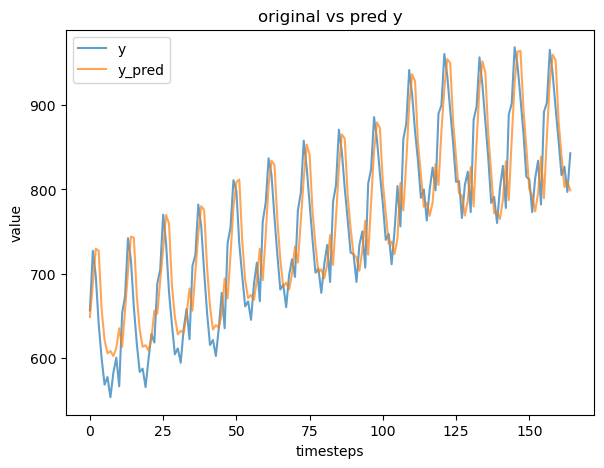

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(y_actual, label='y', alpha=0.7)
plt.plot(y_pred, label='y_pred', alpha=0.7)
plt.title('original vs pred y')
plt.xlabel('timesteps')
plt.ylabel('value')
plt.legend()

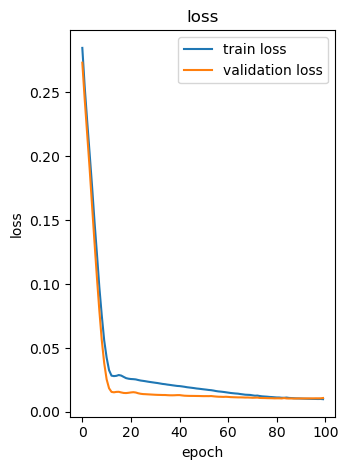

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,565 (228.77 KB)

 Trainable params: 19,521 (76.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,044 (152.52 KB)

In [19]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
train_accuracy = 1 - train_loss

test_loss = model.evaluate(X_test, y_test, verbose=0)
test_accuracy = 1 - test_loss

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9896392663940787
Test Accuracy: 0.9881991175934672
